In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Importing datasets

In [2]:
df_trts = pd.read_csv('train_time_series.csv')

In [3]:
df_trl = pd.read_csv('train_labels.csv')

# Merging Datasets based on timestamp

In [4]:
df = pd.merge(df_trl,df_trts, on=['timestamp'])

In [5]:
df.head()

,Unnamed: 0_x,timestamp,UTC time_x,label,Unnamed: 0_y,UTC time_y,accuracy,x,y,z
0,20589,1565109931087,2019-08-06T16:45:31.087,1,20589,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
1,20599,1565109932090,2019-08-06T16:45:32.090,1,20599,2019-08-06T16:45:32.090,unknown,0.013718,-0.852371,-0.000870
2,20609,1565109933092,2019-08-06T16:45:33.092,1,20609,2019-08-06T16:45:33.092,unknown,0.145584,-1.007843,-0.036819
3,20619,1565109934094,2019-08-06T16:45:34.094,1,20619,2019-08-06T16:45:34.094,unknown,-0.099380,-1.209686,0.304489
4,20629,1565109935097,2019-08-06T16:45:35.097,1,20629,2019-08-06T16:45:35.097,unknown,0.082794,-1.001434,-0.025375


# Keeping only useful columns

In [6]:
df = df[['timestamp','label','x','y','z']]

In [7]:
df.shape

(375, 5)

In [8]:
df.isnull().sum()

timestamp    0
label        0
x            0
y            0
z            0
dtype: int64

In [14]:
#merge dataframe
df3 = pd.merge(df_trts,df_trl, on=['timestamp'], how = 'left')

In [15]:
#filling label gaps
df3['label']=df3['label'].where(df3['label'].notnull(), other=(df3['label'].fillna(method='ffill')+df3['label'].fillna(method='bfill'))/2)

In [19]:
#keeping useful columns and deleting rows with uncertain label 
df3 = df3[['timestamp','x','y','z','label']]
df3.label = df3['label'].replace([1.5,2.5,3.5],np.nan)
df3 = df3.dropna()
#calculating acceleration to independize from accelerometer orientation
df3['acceleration'] = (df3.x**2 + df3.y**2 + df3.z**2)**0.5

In [25]:
df3l1 = df3.loc[5:75]
df3l1.head()

,timestamp,x,y,z,label,acceleration
5,1565109931288,-0.010880,-0.967575,0.170898,1.0,0.982612
6,1565109931388,0.052841,-0.982330,0.235565,1.0,1.011561
7,1565109931488,0.032974,-1.053207,0.256714,1.0,1.084544
8,1565109931589,-0.090424,-0.972794,0.356308,1.0,1.039932
9,1565109931689,0.124268,-0.890533,0.223221,1.0,0.926455


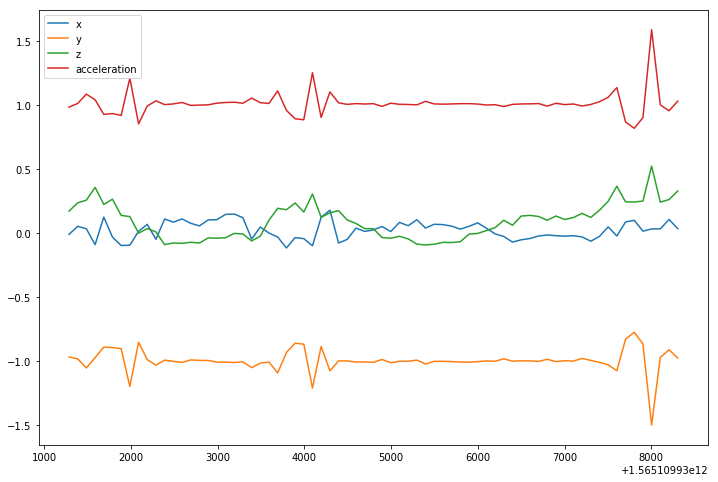

In [26]:
#plotting label1 sample to see pattern
plt.figure(figsize=(12,8))
plt.plot(df3l1.timestamp,df3l1.x)
plt.plot(df3l1.timestamp,df3l1.y)
plt.plot(df3l1.timestamp,df3l1.z)
plt.plot(df3l1.timestamp,df3l1.acceleration)
plt.legend()
plt.show()

In [ ]:
df3.head()

In [29]:
df3l2 = df3.loc[85:155]
df3l2.tail()

,timestamp,x,y,z,label,acceleration
151,1565109945921,0.990189,-1.346603,-0.018295,2.0,1.671571
152,1565109946022,-0.043243,-0.893326,-0.149338,2.0,0.906754
153,1565109946122,0.083878,-0.950729,-0.048096,2.0,0.955633
154,1565109946222,0.535095,-1.015015,0.163803,2.0,1.159057
155,1565109946322,-0.114365,-1.242584,0.291733,2.0,1.281485


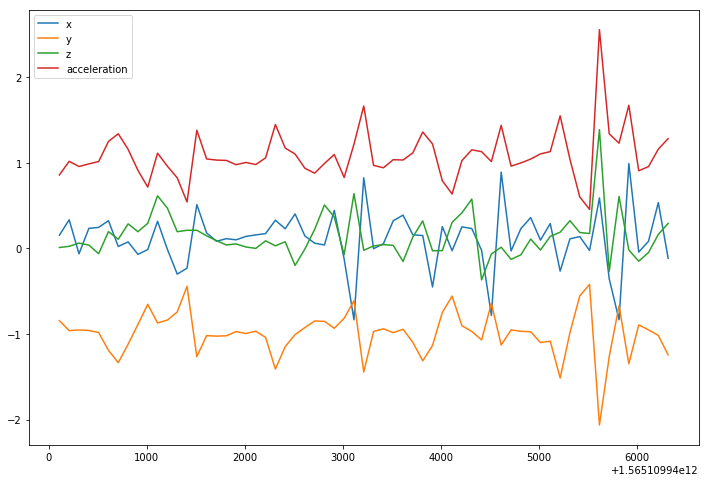

In [30]:
plt.figure(figsize=(12,8))
plt.plot(df3l2.timestamp,df3l2.x)
plt.plot(df3l2.timestamp,df3l2.y)
plt.plot(df3l2.timestamp,df3l2.z)
plt.plot(df3l2.timestamp,df3l2.acceleration)
plt.legend()
plt.show()

In [33]:
df3l3 = df3.loc[1582:1682]
df3l3.head(10)

,timestamp,x,y,z,label,acceleration
1582,1565110089442,0.395767,-1.222717,-0.537125,3.0,1.392901
1583,1565110089542,-0.019714,-0.891068,0.100052,3.0,0.896884
1584,1565110089643,0.414230,-0.742172,0.123383,3.0,0.858854
1585,1565110089743,0.398895,-0.547028,-0.045731,3.0,0.678563
1586,1565110089843,0.415039,-0.864029,0.003357,3.0,0.958548
1587,1565110089943,0.421906,-1.785599,0.702393,3.0,1.964618
1588,1565110090044,0.101624,-0.792831,0.193848,3.0,0.822488
1589,1565110090144,0.168839,-0.524475,0.200058,3.0,0.586177
1590,1565110090244,0.141785,-0.644012,0.198898,3.0,0.688778
1591,1565110090344,0.378662,-0.825760,-0.016968,3.0,0.908599


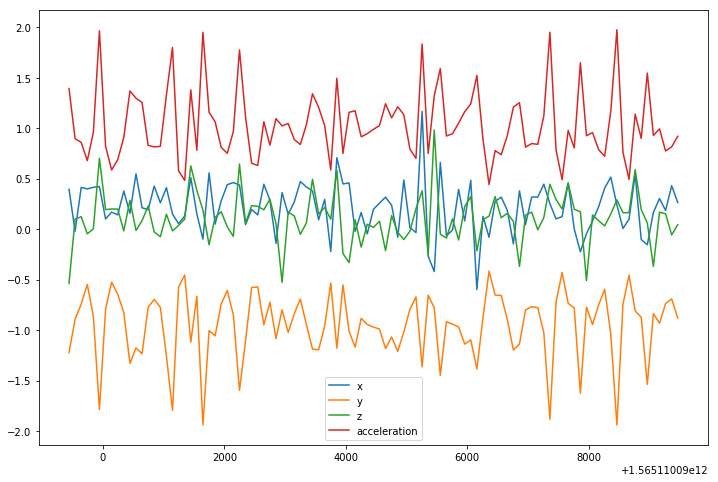

In [34]:
plt.figure(figsize=(12,8))
plt.plot(df3l3.timestamp,df3l3.x)
plt.plot(df3l3.timestamp,df3l3.y)
plt.plot(df3l3.timestamp,df3l3.z)
plt.plot(df3l3.timestamp,df3l3.acceleration)
plt.legend()
plt.show()

In [ ]:
df_label4_1 = df3.loc[961:1061]
df_label4_1.tail(20)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df_label4_1.timestamp,df_label4_1.x)
plt.plot(df_label4_1.timestamp,df_label4_1.y)
plt.plot(df_label4_1.timestamp,df_label4_1.z)
plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

In [ ]:
i = 0
j= 10
movelet_1_x = []
for n in range(30):
    movelet_1_x.append(df_label1_1.x[i:j])
    i+=1
    j+=1


In [ ]:
i = 0
j= 10
movelet_1_y = []
for n in range(30):
    movelet_1_y.append(df_label1_1.y[i:j])
    i+=1
    j+=1

In [ ]:
i = 0
j= 10
movelet_1_z = []
for n in range(30):
    movelet_1_z.append(df_label1_1.z[i:j])
    i+=1
    j+=1

In [ ]:
def movelet_generator(df):
    df = df.reset_index()
    axis = ['x','y','z','acceleration']
    i = 0
    j= 10
    movelet = pd.DataFrame(columns = axis)
    for n in range(30):
        temp_dict = {}
        movelet.x = temp_dict(x)
        
        for a in axis:
            temp = df[a][i:j]
            temp_dict[a] = temp
        i+=1
        j+=1
    return movelet

    

In [ ]:
movelet_dict_1 = movelet_generator(df_label1_1)

In [ ]:
movelet_dict_1['x'] = [1,2,3,4,5,6,7,8,9]

In [ ]:
movelet_dict_1['x'].iloc[0] = df_label1_1['x'][0:10]

In [ ]:
movelet_dict_1['x']

In [ ]:
m = pd.DataFrame(['x','y','z'])

In [ ]:
df_label1_1 = df_label1_1.reset_index()
m['x'] = df_label1_1['x'][0:10]

In [ ]:
m['x'] = df_label1_1['x'][0:10]

In [ ]:
m['x']

In [ ]:
toto = df_label1_1['x'][0:10]

In [ ]:
toto

In [ ]:
m['x'] = m['x'].append (toto, ignore_index = True)

In [ ]:
m.x

In [ ]:
movelet_dict_1['label']  =1

In [ ]:
movelet_dict_2 = movelet_generator(df_label2_1)

In [ ]:
movelet_dict_2['label'] = 2

In [ ]:
movelet_dict_3 = movelet_generator(df_label3_1)

In [ ]:
movelet_dict_3['label']  = 3

In [ ]:
movelet_dict_4 = movelet_generator(df_label4_1)

In [ ]:
movelet_dict_4['label']  = 4

In [ ]:
movelet_dict_4.acceleration.loc[0]

In [ ]:
movelet_dict = pd.concat([movelet_dict_1,movelet_dict_2,movelet_dict_3,movelet_dict_4], axis=0, join='outer', ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

In [ ]:
movelet_dict_1


In [ ]:
movelet_dict_4['z'][29]

In [ ]:
X_test = df3[['x','y','z','acceleration','label']][657:667]

In [ ]:
X_test.head()

In [ ]:
#ahora tengo que sacar la diferencia entre el movelet incongnita y el diccionario de movelet

In [ ]:
mdictx =movelet_dict['x'][0:10][0].reset_index(drop = True)

In [ ]:
mdictx

In [ ]:
X_test_x = X_test['x'].reset_index(drop = True)

In [ ]:
diff = mdictx - X_test_x

In [ ]:
diff

In [ ]:
np.sum(diff**2)

In [ ]:
def label_prediction(X_test,movelet_dict):
    #x_testx = X_test['x'].reset_index(drop = True)
    #x_testy = X_test['y'].reset_index(drop = True)
    #x_testz = X_test['z'].reset_index(drop =True)
    #x_testa = X_test['acceleration'].reset_index(drop =True)
    min_label_predict = []
    axis = ['x','y','z','acceleration']
    for i in range(movelet_dict.shape[0]):
        for j in axis:
            differences= []
            mdict = movelet_dict[j][i].reset_index(drop = True)
            diff = np.sum((mdict - (X_test[j].reset_index(drop = True))**2))
            differences.append(diff)
            min_loc = differences.index(min(differences))
            min_label = movelet_dict['label'][min_loc]
            min_label_predict.append(min_label)
    return min_label_predict
    


In [ ]:
labels = label_prediction(X_test,movelet_dict )

In [ ]:
min_label_predict = []
axis = ['x','y','z','acceleration']
for j in axis:
    differences= []
    for i in range(movelet_dict.shape[0]):
        mdict = movelet_dict[j][i].reset_index(drop = True)
        diff = np.sum((mdict - (X_test[j].reset_index(drop = True))**2))
        differences.append(diff)
    min_loc = differences.index(min(differences))
    min_label = movelet_dict['label'][min_loc]
    min_label_predict.append(min_label)
print(min_label_predict)


In [ ]:
min_loc

In [ ]:
x_testx = X_test['x'].reset_index(drop = True) 
differences = []
for i in range(movelet_dict.shape[0]):
    mdict_x = movelet_dict['x'][i].reset_index(drop = True)
    diff = np.sum((mdict_x - x_testx)**2)
    differences.append(diff)
    min_loc = differences.index(min(differences))
    min_label = movelet_dict['label'][min_loc]

In [ ]:
movelet_dict

In [ ]:
min_loc

In [ ]:
movelet_dict.label.loc[110]

In [ ]:
#HAsta aca obtuve el label para el eje x, tengo que hacer lo mismo para 'y' y 'z' y definir de acuerdo al que sea mayoritario.
#si tengo los 3 distintos tendria que ver cual es para cada uno el segundo mejor ajuste...

In [ ]:
x_testy = X_test['y'].reset_index(drop = True) 
differences = []
for i in range(movelet_dict.shape[0]):
    mdict_y = movelet_dict['y'][i].reset_index(drop = True)
    diff = np.sum((mdict_y - x_testy)**2)
    differences.append(diff)
    min_loc = differences.index(min(differences))
    min_label = movelet_dict['label'][min_loc]

In [ ]:
movelet_dict.label.loc[min_loc]

In [ ]:
differences[min_loc]

In [ ]:
movelet_dict['index_m'] = range(0,movelet_dict.shape[0])

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(10),movelet_dict.x[9], color = 'grey')
plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(10),movelet_dict.z[9], color = 'green')
plt.plot(range(10),x_testy, color = 'orange')
plt.plot(range(10),x_testx, color = 'black')
plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')

#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

In [ ]:
movelet_dict.z[9]

In [ ]:
movelet_dict.tail()